In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.io import loadmat

In [55]:
def generateGraph(audio, title):
    Fs, x = read(audio)
    try:
        xn = [x[i][0] for i in range(len(x))]
    except IndexError:
        xn = [x[i] for i in range(len(x))]

    # Ses şiddetini normalize et (Peak Normalizasyonu)
    def peak_normalize(audio):
        max_val = np.max(np.abs(audio))
        return audio / max_val

    normalized_audio = peak_normalize(xn)

    # Zamansal Sinyal Grafiği
    N = len(xn)
    n = np.arange(0, N)
    plt.figure()
    plt.title(title)
    plt.stem(n, normalized_audio)
    plt.xlabel("n (örnek)")
    plt.ylabel("x[n]")
    plt.show()

    # Frekans Spektrumu
    w = np.linspace(0, np.pi, N // 2)
    Xw = fft(normalized_audio)
    
    # FFT Sonucunu Normalize Etme
    Xw_mag = np.abs(Xw[:N // 2]) / np.max(np.abs(Xw[:N // 2]))    
    Xw_phs = np.unwrap(np.angle(Xw[:N // 2]))
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(w / np.pi, Xw_mag)
    ax1.set_ylabel("Magnitude")
    ax1.set_title("Frequency Spectrum (Magnitude)")

    ax2.plot(w / np.pi, Xw_phs)
    ax2.set_ylabel("Phase (radians)")
    ax2.set_xlabel("Frequency (xπ rad/sample)")
    ax2.set_title("Frequency Spectrum (Phase)")
    
    plt.tight_layout()
    plt.show()
    return Fs

In [56]:
def xnCalculator(audio):
    Fs, x = read(audio)
    try:
        xn = [x[i][0] for i in range(len(x))]
    except IndexError:
        xn = [x[i] for i in range(len(x))]

    # Ses şiddetini normalize et (Peak Normalizasyonu)
    def peak_normalize(audio):
        max_val = np.max(np.abs(audio))
        return audio / max_val

    normalized_audio = peak_normalize(xn)

    # Zamansal Sinyal Grafiği
    N = len(xn)
    n = np.arange(0, N)

    # Frekans Spektrumu
    w = np.linspace(0, np.pi, N // 2)
    Xw = fft(normalized_audio)
    
    # FFT Sonucunu Normalize Etme
    Xw_mag = np.abs(Xw[:N // 2]) / np.max(np.abs(Xw[:N // 2]))    
    Xw_phs = np.unwrap(np.angle(Xw[:N // 2]))

    return xn

# Filter

In [57]:
def generateFilterGraph(filter,type):
    """
    Bu fonksiyon filtrelerin grup geçikmesi, faz ve amplitude grafiklerini çizdirmek için oluşturuldu.
    filter parametresi filtrenin .mat dosyası 
    """
    
    filter_data = loadmat(filter)

    Coeffs = filter_data["ba"].astype(float)
    
    # FIR filtre olduğunda a tanımlanmaz o kısmı 1'e eşitliyoruz
    if Coeffs.shape[1] == 1:
        b = Coeffs[:,0] 
        w, Hw = sgnl.freqz(b)
        a = np.array([1]) 
    else:
        b = Coeffs[:,0]
        a = Coeffs[:,1]
        w, Hw = sgnl.freqz(b,a)

    Hw_mag = abs(Hw)
    Hw_phs = np.unwrap(np.angle(Hw))

    print(type)
    
    plt.subplots_adjust(hspace=1)

    plt.subplot(211)
    plt.plot(w/np.pi, Hw_mag)
    plt.title("Magnitude of the filter")
    plt.xlabel("frequency x$\pi$ rad/sample")
    plt.ylabel("Amplitude")
    
    plt.subplot(212)
    plt.plot(w/np.pi, Hw_phs)
    plt.title("Phase of the filter")
    plt.xlabel("frequency x$\pi$ rad/sample")
    plt.ylabel("degrees")

IIR Lowpass Filter, (Butterworth)


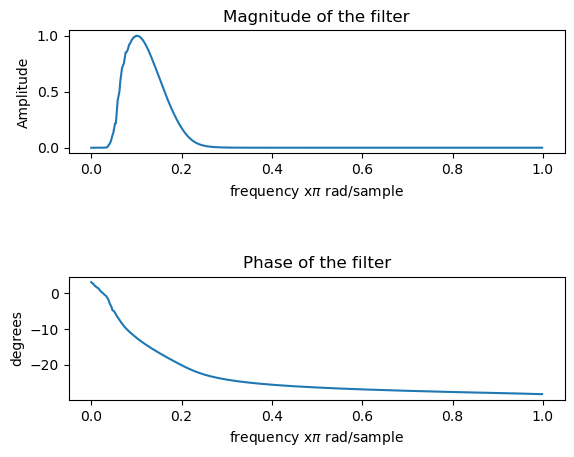

In [58]:
generateFilterGraph("bandpassX2.mat","IIR Lowpass Filter, (Butterworth)")

In [59]:
def applyFilter(filter,X):
    filter_data = loadmat(filter)

    Coeffs = filter_data["ba"].astype(float)
    
    # FIR filtre olduğunda a tanımlanmaz o kısmı 1'e eşitliyoruz
    if Coeffs.shape[1] == 1:
        b = Coeffs[:,0] 
        w, Hw = sgnl.freqz(b)
        a = np.array([1]) 
    else:
        b = Coeffs[:,0]
        a = Coeffs[:,1]
        w, Hw = sgnl.freqz(b,a)
    N = len(X)
    Hw_mag = abs(Hw)
    Hw_phs = np.unwrap(np.angle(Hw))
    
    filtered_signal = sgnl.lfilter(b, a, X)
    
    w = np.linspace(0, np.pi, N//2)
    Xw = fft(filtered_signal)
    
    Xw_mag = np.abs(Xw)  

    plt.figure(figsize = (20,20))
    plt.subplot(211)
    plt.plot(w / np.pi, Xw_mag[:N//2])
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum (Magnitude)")
    
    plt.tight_layout()
    plt.show()
    return filtered_signal

# Pitch

In [60]:
def pitch(audio):
    Fs, x = read(audio)
    
    try:
        xn = [x[i][0] for i in range(len(x))]
    except IndexError:
        xn = [x[i] for i in range(len(x))]

    # Ses şiddetini normalize et (Peak Normalizasyonu)
    def peak_normalize(audio):
        max_val = np.max(np.abs(audio))
        return audio / max_val

    normalized_audio = peak_normalize(xn)

    # Zamansal Sinyal Grafiği
    N = len(xn)
    n = np.arange(0, N)

    # Frekans Spektrumu
    w = np.linspace(0, np.pi, N // 2)
    Xw = fft(normalized_audio)
    
    
    Xw_mag = np.abs(Xw[:N // 2])   
    Xw_phs = np.unwrap(np.angle(Xw[:N // 2]))

    dominant_frequency_index = np.argmax(Xw_mag)
    dominant_frequency = w[dominant_frequency_index] * (Fs / (np.pi*2))
    
    print("Temel frekans (pitch):", dominant_frequency, "Hz")
    return dominant_frequency


# YOUNG MAN

## Train Data

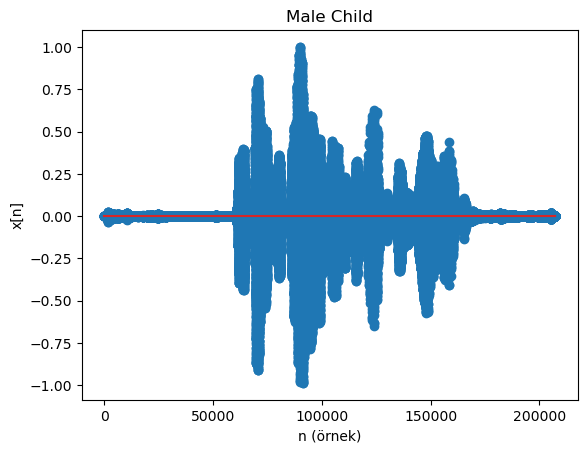

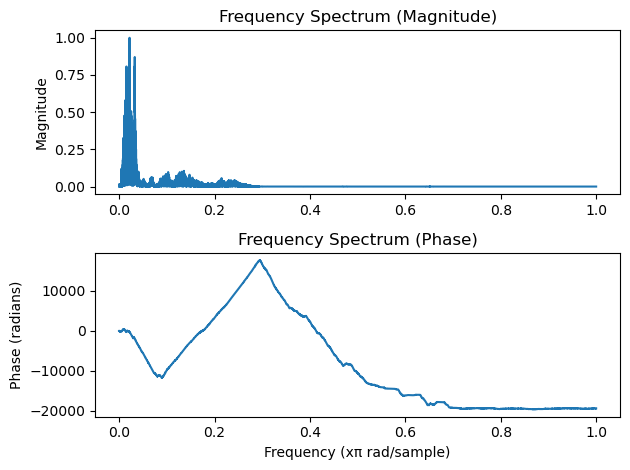

48000

In [61]:
generateGraph("young man test3.wav","Male Child")

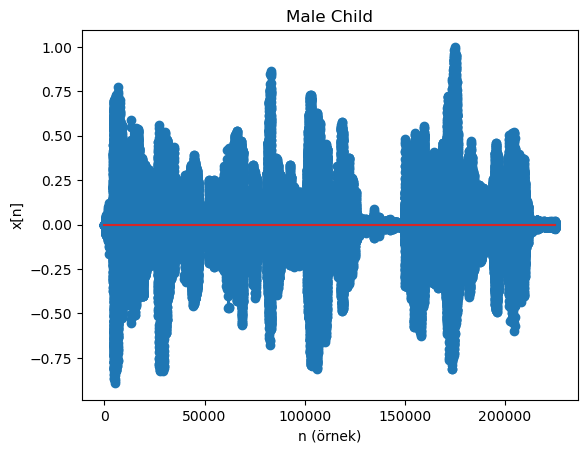

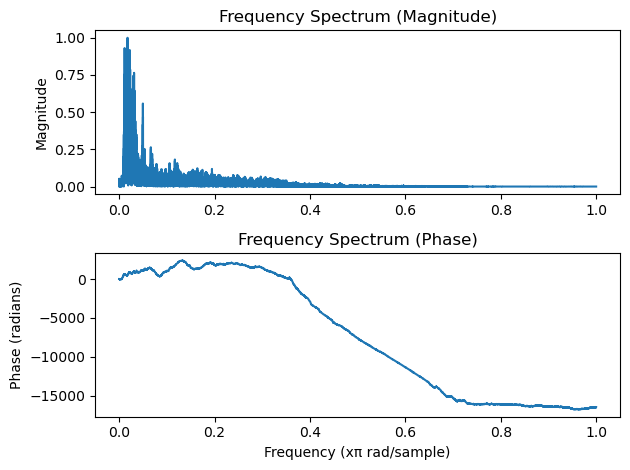

44100

In [62]:
generateGraph("young man train1.wav","Male Child")

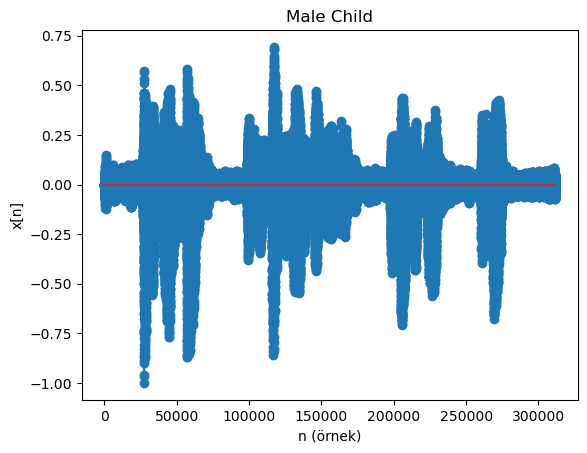

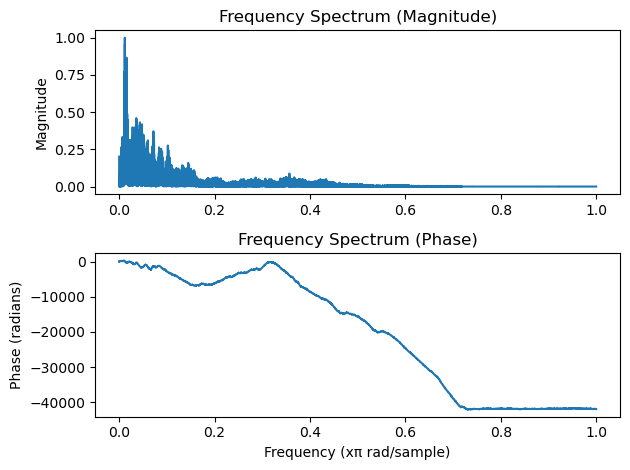

44100

In [63]:
generateGraph("young man train2.wav","Male Child")

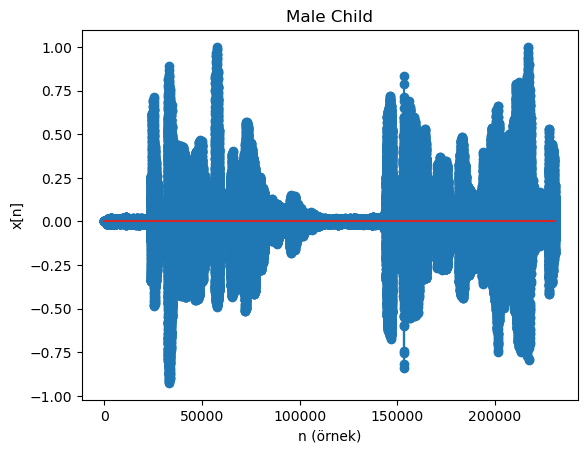

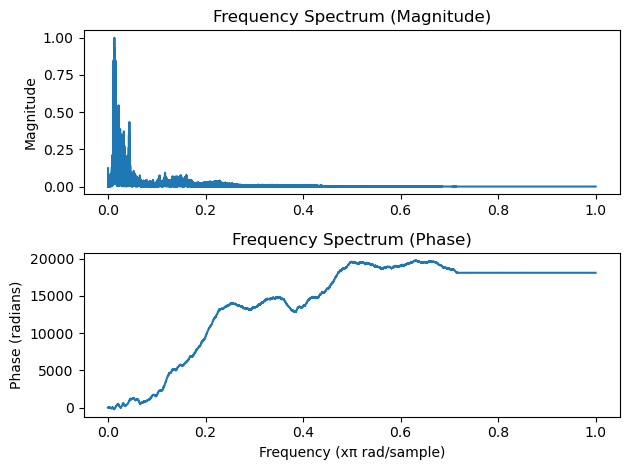

44100

In [64]:
generateGraph("young man train3.wav","Male Child")

In [65]:
pitch("young man train1.wav")

Temel frekans (pitch): 388.38068181818176 Hz


388.38068181818176

In [66]:
pitch("young man train2.wav")

Temel frekans (pitch): 262.7661554257845 Hz


262.7661554257845

In [67]:
pitch("young man train3.wav")

Temel frekans (pitch): 286.52973768504893 Hz


286.52973768504893

## Test Data

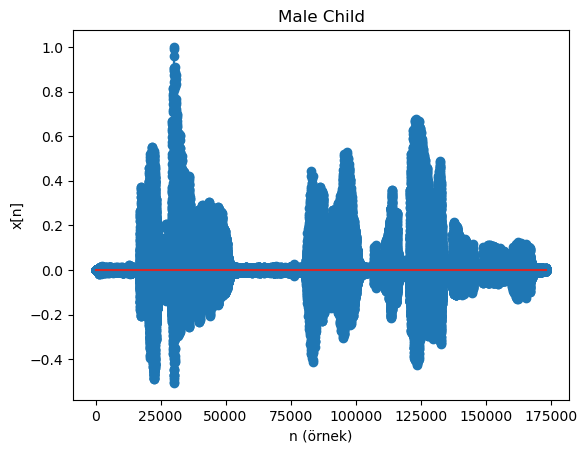

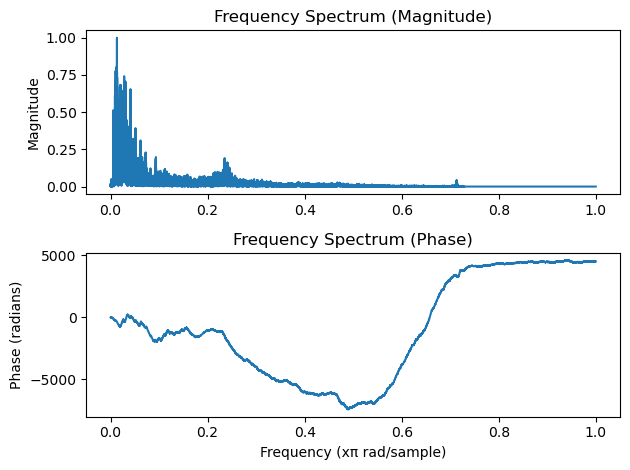

44100

In [68]:
generateGraph("young man test1.wav","Male Child")

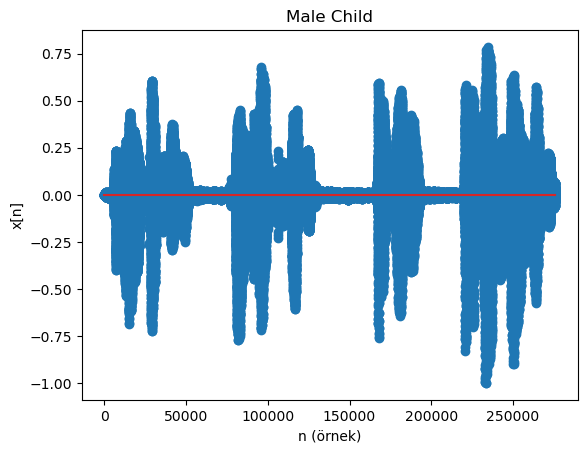

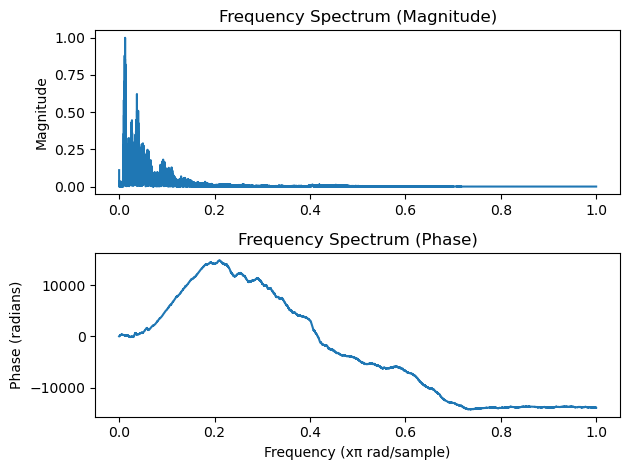

44100

In [69]:
generateGraph("young man test2.wav","Male Child")

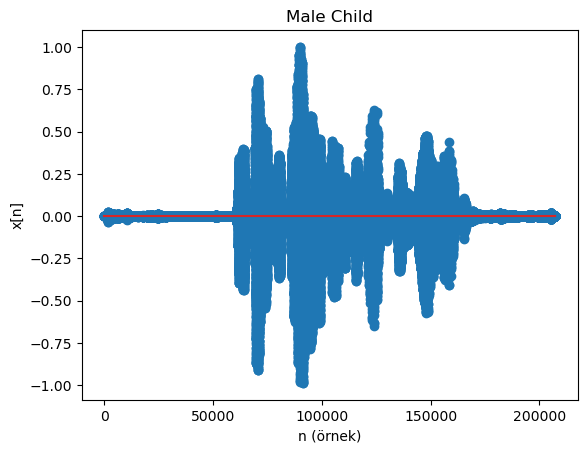

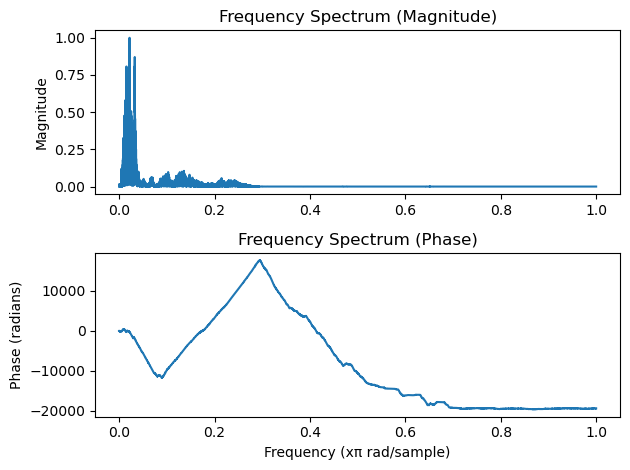

48000

In [70]:
generateGraph("young man test3.wav","Male Child")

In [71]:
pitch("young man test1.wav")

Temel frekans (pitch): 285.5743282205051 Hz


285.5743282205051

In [72]:
pitch("young man test2.wav")

Temel frekans (pitch): 275.9965645701364 Hz


275.9965645701364

In [73]:
pitch("young man test3.wav")

Temel frekans (pitch): 523.61616142131 Hz


523.61616142131

# OLD MAN

## Train Data

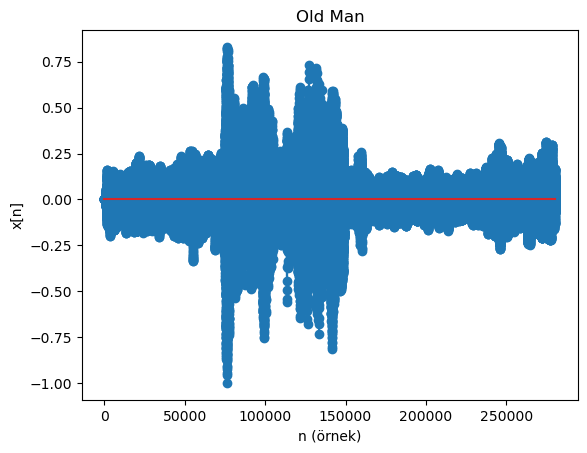

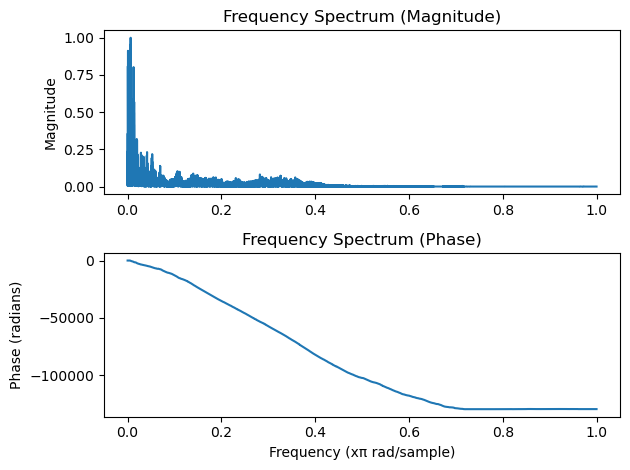

44100

In [74]:
generateGraph("old man train1.wav","Old Man")

In [ ]:
generateGraph("old man train2.wav","Old Man")

In [ ]:
generateGraph("old man train3.wav","Old Man")

In [ ]:
pitch("old man train1.wav")

In [ ]:
pitch("old man train2.wav")

In [ ]:
pitch("old man train3.wav")

## Test Data

In [ ]:
generateGraph("old man test1.wav","Old Man")

In [ ]:
generateGraph("old man test2.wav","Old Man")

In [ ]:
generateGraph("old man test3.wav","Old Man")

In [ ]:
pitch("old man test1.wav")

In [ ]:
pitch("old man test2.wav")

In [ ]:
pitch("old man test3.wav")

In [ ]:
def pitch(audio):
    Fs, x = read(audio)
    
    try:
        xn = [x[i][0] for i in range(len(x))]
    except IndexError:
        xn = [x[i] for i in range(len(x))]

    # Ses şiddetini normalize et (Peak Normalizasyonu)
    def peak_normalize(audio):
        max_val = np.max(np.abs(audio))
        return audio / max_val

    normalized_audio = peak_normalize(xn)

    # Zamansal Sinyal Grafiği
    N = len(xn)
    n = np.arange(0, N)

    # Frekans Spektrumu
    w = np.linspace(0, np.pi, N // 2)
    Xw = fft(normalized_audio)
    
    # FFT Sonucunu Normalize Etme
    Xw_mag = np.abs(Xw[:N // 2]) / np.max(np.abs(Xw[:N // 2]))    
    Xw_phs = np.unwrap(np.angle(Xw[:N // 2]))

    dominant_frequency_index = np.argmax(Xw_mag)
    dominant_frequency = w[dominant_frequency_index] * (Fs / (2 * np.pi))
    
    print("Temel frekans (pitch):", dominant_frequency, "Hz")
    return dominant_frequency


# Güç Hesabı

In [ ]:
def calculate_power(signal):
    # Sinyalin gücünü hesapla
    power = np.sum(np.abs(signal) ** 2) / len(signal)
    return power


filtred_signalo = applyFilter("bandpassX2.mat",xnCalculator("old man train2.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
filtred_signaly = applyFilter("bandpassX2.mat",xnCalculator("young man train2.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
#normalize
filtred_signal_normalizedo = filtred_signalo / np.max(np.abs(filtred_signalo))
filtred_signal_normalizedy = filtred_signaly / np.max(np.abs(filtred_signaly))

# Gücü hesapla
signal_power_old = calculate_power(filtred_signal_normalizedo)
signal_power_young = calculate_power(filtred_signal_normalizedy)

print("Yaşlı sinyal Gücü:", signal_power_old)
print("Genç sinyal Gücü:", signal_power_young)

In [ ]:
filtred_signalo = applyFilter("bandpassX2.mat",xnCalculator("old man test2.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
filtred_signaly = applyFilter("bandpassX2.mat",xnCalculator("young man test2.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
#normalize
filtred_signal_normalizedo = filtred_signalo / np.max(np.abs(filtred_signalo))
filtred_signal_normalizedy = filtred_signaly / np.max(np.abs(filtred_signaly))

# Gücü hesapla
signal_power_old = calculate_power(filtred_signal_normalizedo)
signal_power_young = calculate_power(filtred_signal_normalizedy)

print("Yaşlı sinyal Gücü:", signal_power_old)
print("Genç sinyal Gücü:", signal_power_young)

In [ ]:
filtred_signalo = applyFilter("bandpassX2.mat",xnCalculator("old man train1.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
filtred_signaly = applyFilter("bandpassX2.mat",xnCalculator("young man train1.wav")) # Buraya filtreden geçmiş ses sinyalini atayın
#normalize
filtred_signal_normalizedo = filtred_signalo / np.max(np.abs(filtred_signalo))
filtred_signal_normalizedy = filtred_signaly / np.max(np.abs(filtred_signaly))

# Gücü hesapla
signal_power_old = calculate_power(filtred_signal_normalizedo)
signal_power_young = calculate_power(filtred_signal_normalizedy)

print("Yaşlı sinyal Gücü:", signal_power_old)
print("Genç sinyal Gücü:", signal_power_young)